## Import necessary libraries

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots


In [75]:
import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [76]:
Coca_Cola = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
Coca_Cola 

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


## Data understanding

In [77]:
Coca_Cola.dtypes

Quarter     object
Sales      float64
dtype: object

In [78]:
Coca_Cola.shape

(42, 2)

In [79]:
Coca_Cola.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [80]:
Coca_Cola.isnull().sum()

Quarter    0
Sales      0
dtype: int64

## Data Viz

<AxesSubplot:>

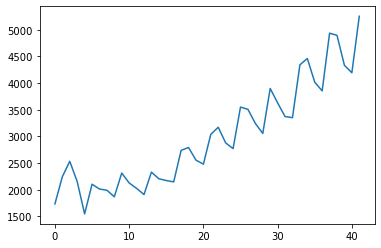

In [81]:
Coca_Cola.Sales.plot()

<AxesSubplot:xlabel='Sales'>

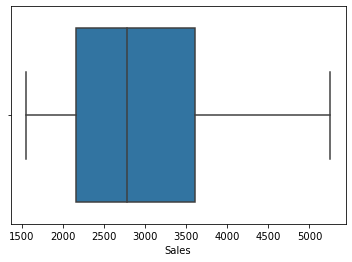

In [82]:
sns.boxplot(Coca_Cola.Sales)

<Figure size 1080x576 with 0 Axes>

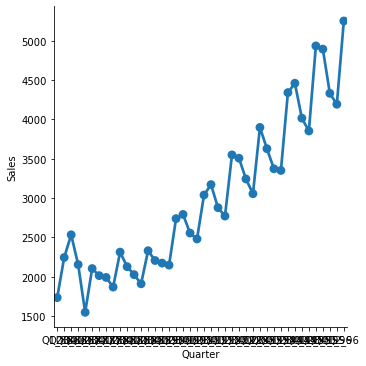

<Figure size 1080x576 with 0 Axes>

In [83]:
sns.factorplot('Quarter','Sales',data=Coca_Cola)
plt.figure(figsize=(15,8))

## Data Driven Based

### Moving Average

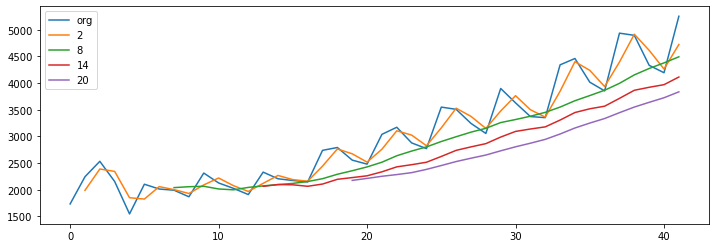

In [84]:
plt.figure(figsize=(12,4))
Coca_Cola.Sales.plot(label='org')
for i in range(2,24,6):
    Coca_Cola["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

### Time series decomposition plot

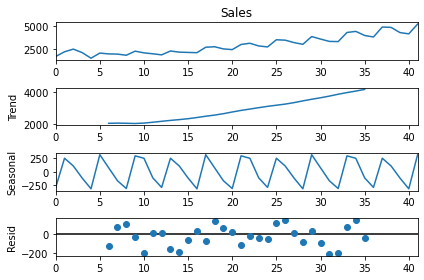

In [85]:
decompose_ts_add = seasonal_decompose(Coca_Cola.Sales,freq=12,model="additive")
decompose_ts_add.plot()
plt.show()

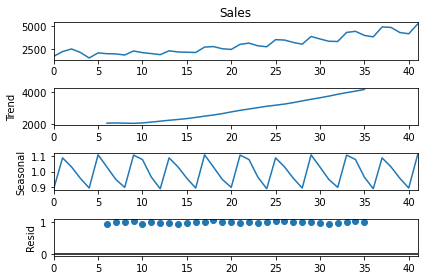

In [86]:
decompose_ts_add = seasonal_decompose(Coca_Cola.Sales,freq=12,model="multiplicative")
decompose_ts_add.plot()
plt.show()

### ACF and PACF Plots

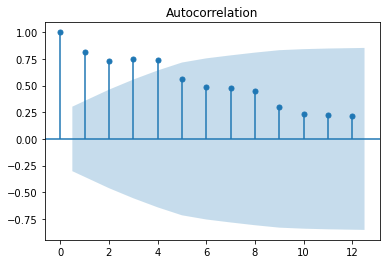

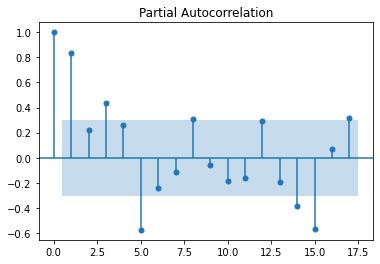

In [87]:
tsa_plots.plot_acf(Coca_Cola.Sales,lags=12)
tsa_plots.plot_pacf(Coca_Cola.Sales)
plt.show()

## Model building

In [88]:
Train = Coca_Cola.head(32)
Test  = Coca_Cola.tail(10)

In [89]:
# Evaluation Matrix MAPE
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### 1. Simple Expontial Methods

In [90]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales)

19.816641138479394

### 2. Holt Method

In [91]:
hw_model = Holt(Train["Sales"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales)

14.555237856069931

### 3. Holts winter exponential smoothing with additive seasonality and additive trend

In [92]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)

12.285893632531486

### 4. Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [93]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

6.7786245949093855

### From above 4 methods, we can see least MAPE for Holts Method

In [94]:
hw_model = Holt(Coca_Cola["Sales"]).fit()

## Lets see 10 future forecast

In [95]:
hw_model.forecast(10)

42    4973.233122
43    5088.056863
44    5202.880604
45    5317.704345
46    5432.528086
47    5547.351827
48    5662.175568
49    5776.999309
50    5891.823051
51    6006.646792
dtype: float64

In [96]:
hw_model.params

{'smoothing_level': 0.3863589168714722,
 'smoothing_trend': 0.3477231367851602,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1759.2890562860566,
 'initial_trend': 25.91474973570942,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

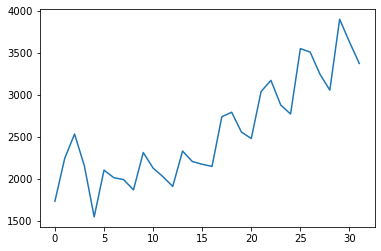

In [97]:
plt.plot(Train.index, Train['Sales'], label='Train')

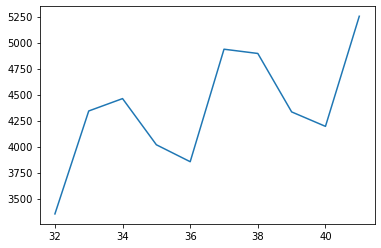

In [98]:
plt.plot(Test.index, Test['Sales'], label='Test')

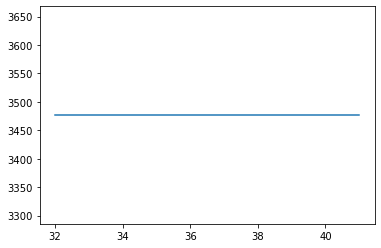

In [99]:
plt.plot(pred_ses.index, pred_ses, label='pred_SimpleExponential')

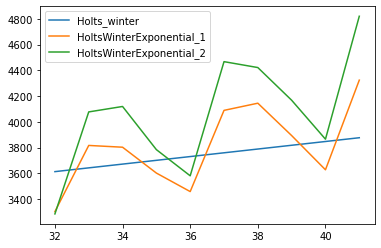

In [100]:
plt.plot(pred_hw.index, pred_hw, label='Holts_winter')
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2")
plt.legend(loc='best')

## Model Based Methods

In [101]:
quarter=['Q1','Q2','Q3','Q4']
n=Coca_Cola['Quarter'][0]
n[0:2]

Coca_Cola['quarter']=0

In [102]:
for i in range(42):
   
    n=Coca_Cola['Quarter'][i]
    Coca_Cola['quarter'][i]=n[0:2]
    
dummy=pd.DataFrame(pd.get_dummies(Coca_Cola['quarter']))

Coca_Cola_1=pd.concat((Coca_Cola,dummy),axis=1)
Coca_Cola_1
    

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2,0,1,0,0


In [103]:
t = np.arange(1, 43)
Coca_Cola_1['t']=t
Coca_Cola_1['t_square']=Coca_Cola_1['t']*Coca_Cola_1['t']
log_Sales=np.log(Coca_Cola_1['Sales'])
Coca_Cola_1['log_Sales']=log_Sales

In [104]:
Coca_Cola_1

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


## Model Building | Model Training | Model Testing

In [105]:
Train = Coca_Cola_1.head(32)
Test  = Coca_Cola_1.tail(10)

### 1. Linear model

In [106]:
linear = smf.ols('Sales~t',data=Train).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(Test['t'])))
rmselin=np.sqrt((np.mean(np.array(Test['Sales'])-np.array(predlin))**2))
rmselin

603.8900128503703

### 2. Quadratic Model

In [107]:
quad = smf.ols('Sales~t+t',data=Train).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(Test[['t','t_square']])))
rmsequad=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(predquad))**2))
rmsequad

752.9233932767115

### 3. Exponetial model

In [108]:
expo = smf.ols('log_Sales~t',data=Train).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(Test['t'])))
predexp
rmseexpo=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(predexp)))**2))
rmseexpo

590.3316432076576

### 4. Additive seasonality

In [110]:
additive = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
predadd = pd.Series(additive.predict(Test[['Q1','Q2','Q3','Q4']]))
rmseadd = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(predadd))**2))
rmseadd

1850.4665461858358

### 5. Additive seasonality with linear trend

In [111]:
addlinear = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
predaddlinear = pd.Series(addlinear.predict(Test[['t','Q1','Q2','Q3','Q4']]))
rmseaddlinear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(predaddlinear))**2))
rmseaddlinear

1850.4665461858358

### 6. Additive seasonality with quadratic trend

In [114]:
addquad = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()
predaddquad = pd.Series(addquad.predict(Test[['t','t_square','Q1','Q2','Q3','Q4']]))
rmseaddquad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(predaddquad))**2))
rmseaddquad

277.35107711286446

### 7. Multiplicative seasonality

In [115]:
mulsea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
predmul = pd.Series(mulsea.predict(Test[['Q1','Q2','Q3','Q4']]))
rmsemul = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(predmul))**2))
rmsemul

1850.4665461858358

### 8. Multiplicative seasonality with linear trend

In [116]:
mullin = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
predmullin = pd.Series(mullin.predict(Test[['t','Q1','Q2','Q3','Q4']]))
rmsemulin = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(predmullin))**2))
rmsemul

1850.4665461858358

### 9. Multiplicative seasonality with quadratic trend

In [119]:
mul_quad = smf.ols('log_Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()
pred_mul_quad = pd.Series(mul_quad.predict(Test[['t','t_square','Q1','Q2','Q3','Q4']]))
rmse_mul_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

801.9777856536299

## Compare RMSE Value

In [120]:
data = {'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemulin','rmsequad']),'Value':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}
table_rmse = pd.DataFrame(data)

In [121]:
table_rmse

,Model,Value
0,rmse_mul_quad,801.977786
1,rmseadd,1850.466546
2,rmseaddlinear,1850.466546
3,rmseaddquad,277.351077
4,rmseexpo,590.331643
5,rmselin,603.890013
6,rmsemulin,1850.466546
7,rmsequad,1850.466546
8,NaN,752.923393


### From above table we can see RMSE for Additive Seasonality with quadratic giving less value, so that is best model

# -----------------------------------------------------------------------------